# Week 2 Data Exploration 
### Mia Yancich

January 17, 2024


The purpose of this assignment is to work with [GIS data](https://data.lacounty.gov/pages/emergency) from the Damage Inspection (DINS) database for documenting structures damaged and destroyed by wildland 2025 Palisades fire. 

In [1]:
#print statement
print('First HW coding assigment, yippee')

First HW coding assigment, yippee


In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
# read and add geojson to notebook
url = 'https://hub.arcgis.com/api/v3/datasets/c336759e45764c45861a1e62c4c5e2db_0/downloads/data?format=geojson&spatialRefId=4326&where=1%3D1'
palisades = gpd.read_file(url)

In [4]:
# what's the data type?
type(palisades)

geopandas.geodataframe.GeoDataFrame

The data type is a pandas data frame

Next, we want to find out basic information about the Palisades Dataframe using the method .info to find out index dtype and columns, non-null values and memory usage. We can also use .shape to look at the dimensionality. 

In [5]:
palisades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8495 entries, 0 to 8494
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       8495 non-null   int32   
 1   GLOBALID       8495 non-null   object  
 2   DAMAGE         8495 non-null   object  
 3   STRUCTURETYPE  8495 non-null   object  
 4   geometry       8495 non-null   geometry
dtypes: geometry(1), int32(1), object(3)
memory usage: 298.8+ KB


In [6]:
#Return a tuple representing the dimensionality of the DataFrame
palisades.shape

(8495, 5)

The dataset contains 8,495 rows and 5 columns, meaning there are 8,000+ recorded strucutres and 5 types of data collected on each structures, including their objectid (within the dataset), global ID, Damage, Structure Tyoe, and Geometry (or coordinates). There are no null values (meaning no columns containing empty data) and the dataset uses 298 KB of memory.

The code below allows use to look into the first 10 rows within the dataset, which includes the first row containing header names.

In [7]:
palisades.head(10)

,OBJECTID,GLOBALID,DAMAGE,STRUCTURETYPE,geometry
0,1,749289c2-99a6-4d08-a870-16a6e499021e,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65963 34.03913)
1,2,12de8e53-d11c-40c4-b628-d861d62cc061,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65949 34.03909)
2,3,2236aeb8-d6d8-4c74-a662-292331a35ea2,No Damage,Utility Misc Structure,POINT (-118.65927 34.0391)
3,4,3d521301-742c-4009-8230-cfff2f4b5125,Destroyed (>50%),Multi Family Residence Multi Story,POINT (-118.65761 34.0394)
4,5,11e11323-9a48-41c7-9d22-12ae0f054089,Destroyed (>50%),Single Family Residence Single Story,POINT (-118.65663 34.03881)
5,6,0023c6d1-86f7-44bb-afaa-00e36c6a9538,Destroyed (>50%),Single Family Residence Single Story,POINT (-118.65606 34.03873)
6,7,1fe019cc-766f-4bb2-bf36-c35a2695a19f,Destroyed (>50%),Utility Misc Structure,POINT (-118.65621 34.03882)
7,8,8f94c955-3df8-4b6e-a187-ce6dd2d29b0d,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65571 34.03873)
8,9,e39d9855-ffab-4124-afeb-b12e4f622040,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65561 34.03869)
9,10,5f680d02-e254-477c-9ea9-7332b6592b08,Destroyed (>50%),Single Family Residence Single Story,POINT (-118.65548 34.03865)


In [8]:
#change the column names to lowercase for ease 
palisades.columns = palisades.columns.str.lower()

The code belows returns a Series containing the frequency of each distinct row in the damage column. It will reveal how information on how damages were categorized and how many structures fall within each category. 

In [9]:
#set as a variable to see value counts 
damages = palisades['damage']
damages_count = damages.value_counts()
#reset index to convert panda series into a dataframe  
#makes easier to read
damages_count.reset_index()

,damage,count
0,Destroyed (>50%),4993
1,No Damage,2795
2,Affected (1-9%),508
3,Minor (10-25%),136
4,Major (26-50%),63


As we can see, over <b> half (4,993) of all of the 8,495 structures recorded are destroyed </b> while just about a third have no damage. The rest of the structures are either only affected, or have minor or major damages. 

Next, we will run a query on the data that filters structures to compare damages between destroyed multifamily homes and destroyed single family homes. First, lets see how many different structure types there are.

In [10]:
palisades.structuretype.value_counts()

structuretype
Single Family Residence Multi Story     3846
Single Family Residence Single Story    2801
Utility Misc Structure                  1058
Multi Family Residence Multi Story       313
Commercial Building Single Story         132
School                                    97
Mobile Home Double Wide                   57
Mobile Home Single Wide                   57
Commercial Building Multi Story           51
Infrastructure                            35
Multi Family Residence Single Story       19
Church                                    13
Motor Home                                 8
Mixed Commercial/Residential               6
Mobile Home Triple Wide                    2
Name: count, dtype: int64

We want to run a query that will look at destroyed single family homes so we create a conditional statement that finds all rows that are destroyed and either a single family residence with a multi story or single story. For the purposes of this analysis, we will consider all homes that are single family. We will then run the same query for the multifamily homes. 

In [11]:
sfDestroyed = palisades.loc[(palisades['damage'] =='Destroyed (>50%)') 
            & ((palisades['structuretype'] == 'Single Family Residence Multi Story') | (palisades['structuretype'] == 'Single Family Residence Single Story') )]
sfDestroyed

,objectid,globalid,damage,structuretype,geometry
0,1,749289c2-99a6-4d08-a870-16a6e499021e,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65963 34.03913)
1,2,12de8e53-d11c-40c4-b628-d861d62cc061,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65949 34.03909)
4,5,11e11323-9a48-41c7-9d22-12ae0f054089,Destroyed (>50%),Single Family Residence Single Story,POINT (-118.65663 34.03881)
5,6,0023c6d1-86f7-44bb-afaa-00e36c6a9538,Destroyed (>50%),Single Family Residence Single Story,POINT (-118.65606 34.03873)
7,8,8f94c955-3df8-4b6e-a187-ce6dd2d29b0d,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.65571 34.03873)
...,...,...,...,...,...
8479,10235,736141bb-5a5a-4bb4-977f-a73dcbde69be,Destroyed (>50%),Single Family Residence Single Story,POINT (-118.54605 34.04327)
8485,10274,a1668884-b53d-4fdf-88a6-572d18238f01,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.5239 34.05389)
8486,10275,68310fb2-41e5-4b44-8bb2-f2b55ba18c67,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.5241 34.05391)
8487,10276,a5f84683-eb45-4eb1-b0f0-217779d5dac3,Destroyed (>50%),Single Family Residence Multi Story,POINT (-118.52352 34.05382)


In [12]:
mfDestroyed = palisades.loc[(palisades['damage'] =='Destroyed (>50%)') 
            & ((palisades['structuretype'] == 'Multi Family Residence Multi Story') | (palisades['structuretype'] == 'Multi Family Residence Single Story') )]
mfDestroyed

,objectid,globalid,damage,structuretype,geometry
3,4,3d521301-742c-4009-8230-cfff2f4b5125,Destroyed (>50%),Multi Family Residence Multi Story,POINT (-118.65761 34.0394)
1097,1128,b96682c9-a94c-4a7b-91f0-a6c277f12c0d,Destroyed (>50%),Multi Family Residence Single Story,POINT (-118.63726 34.03868)
1098,1129,c6eca64c-24a1-4375-9258-a458cef46904,Destroyed (>50%),Multi Family Residence Multi Story,POINT (-118.63712 34.03851)
1351,2058,e4d1f9e9-0ef1-42cd-8e1f-596a7a5bdb05,Destroyed (>50%),Multi Family Residence Multi Story,POINT (-118.57275 34.04313)
1610,2320,b09deb2a-baa6-4124-9c21-603235a704dc,Destroyed (>50%),Multi Family Residence Multi Story,POINT (-118.57082 34.04334)
...,...,...,...,...,...
7282,8404,4784a0b5-0639-4eb5-a56b-4639324953d0,Destroyed (>50%),Multi Family Residence Single Story,POINT (-118.53855 34.04822)
7284,8406,1279043b-a4cf-4b3d-86ec-dce22c7e5463,Destroyed (>50%),Multi Family Residence Single Story,POINT (-118.53871 34.04806)
7301,8423,acbd0e57-b257-4841-b04a-e053294fca55,Destroyed (>50%),Multi Family Residence Multi Story,POINT (-118.54352 34.04492)
7800,9131,a33d18b3-ac34-413c-a49b-e4bf4f7add4d,Destroyed (>50%),Multi Family Residence Single Story,POINT (-118.51797 34.04826)


We see there are 3910 single family homes that have been destroyed compared to only 106 multifamily homes. This makes sense given the Pacific Palisades has a large majority of single family homes.

Lastly, we plot the data on a graph to get an understanding of the data spatially using the plot function. This helps us to see the fires path and the location of each building recorded un the dataset. 

<Axes: >

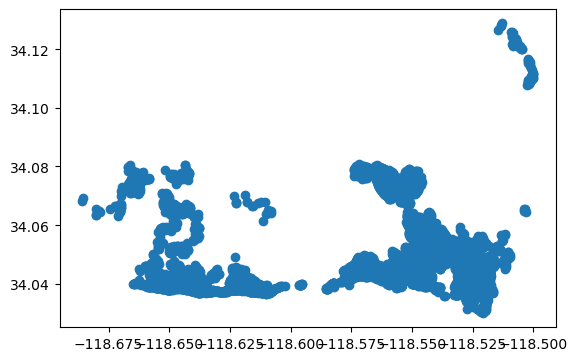

In [13]:
palisades.plot()

The output reveals the locations of all buildings in the dataset. We can make apart different neighborhoods in the Palisades and see that the latitude line is 34 degrees and longitude line is around 118 degrees. 